In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [3]:

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
import seaborn as sns
sns.set_style("whitegrid")

In [5]:
state = 'AL'

In [6]:
file_symptoms_train = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_train.fea'

noun_sentence_state_train = pd.read_feather(file_symptoms_train)

In [7]:
len(noun_sentence_state_train)

125682

In [8]:
#noun_sentence_state_train = noun_sentence_state_train.dropna()

In [9]:
file_symptoms_test = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_test.fea'
noun_sentence_state_test = pd.read_feather(file_symptoms_test)


In [10]:
#noun_sentence_state_test = noun_sentence_state_test.dropna()

In [11]:
noun_sentence_state_test_transdate_train = noun_sentence_state_train.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_train = noun_sentence_state_test_transdate_train.rename(columns={"avmerror": "avmerror_mean"})
noun_sentence_state_test_transdate_train

,Transdate,avmerror_mean
0,20050103,-0.065303
1,20050104,-0.029206
2,20050105,-0.020167
3,20050106,0.011254
4,20050107,-0.027221
...,...,...
4831,20210624,0.066815
4832,20210625,0.036325
4833,20210628,0.119716
4834,20210629,-0.015907


In [12]:
noun_sentence_state_test_transdate_train_count = noun_sentence_state_train.groupby('Transdate').count()[['avmerror']].reset_index()

In [13]:
noun_sentence_state_test_transdate_test = noun_sentence_state_test.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_test = noun_sentence_state_test_transdate_test.rename(columns={"avmerror": "avmerror_mean"})

In [14]:
noun_sentence_state_test_transdate_test_count = noun_sentence_state_test.groupby('Transdate').count()[['avmerror']].reset_index()

In [15]:
noun_sentence_state_test_transdate_test_count[noun_sentence_state_test_transdate_test_count['avmerror']==1]

,Transdate,avmerror
10,20050115,1
46,20050305,1
52,20050313,1
68,20050402,1
79,20050416,1
...,...,...
4439,20210502,1
4445,20210508,1
4451,20210515,1
4467,20210606,1


In [16]:
noun_sentence_state_train = noun_sentence_state_train.merge(noun_sentence_state_test_transdate_train,
                                                         how='left', left_on='Transdate', right_on='Transdate')

In [17]:
noun_sentence_state_test = noun_sentence_state_test.merge(noun_sentence_state_test_transdate_test,
                                                         how='left', left_on='Transdate', right_on='Transdate')

In [18]:
noun_sentence_state_test_transdate_train

,Transdate,avmerror_mean
0,20050103,-0.065303
1,20050104,-0.029206
2,20050105,-0.020167
3,20050106,0.011254
4,20050107,-0.027221
...,...,...
4831,20210624,0.066815
4832,20210625,0.036325
4833,20210628,0.119716
4834,20210629,-0.015907


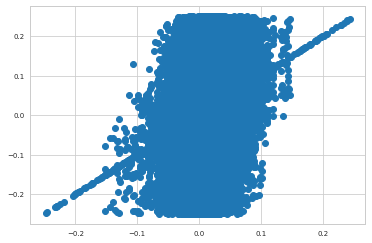

In [19]:
plt.plot(noun_sentence_state_train.avmerror_mean.values,noun_sentence_state_train.avmerror.values,'o')

In [20]:
noun_sentence_state_train.avmerror_mean.values.max()

0.2434952293577981

In [21]:
noun_sentence_state_test_transdate_train.avmerror_mean.values.max()

0.2434952293577981

In [22]:
noun_sentence_state_train.columns[51:]

Index(['fannie mae homepath property', 'earnest money preapproval proof funds',
       'mohawk luxury vinyl plank', 'complete renovation',
       'new custom cabinets', 'corporate addendums', 'softball field',
       'purchase property', 'new beginning', 'young meadows road',
       ...
       'full bath, laundry room, main level',
       'full bath, main level, master bath',
       'full bath, main level, master bedroom',
       'full bath, main level, master suite',
       'full bath, main level, separate shower',
       'full bath, main level, spacious bedrooms',
       'garden tub, great room, separate shower',
       'garden tub, master bath, separate shower',
       'garden tub, master bedroom, separate shower', 'avmerror_mean'],
      dtype='object', length=3008)

In [23]:
noun_sentence_state_train.columns[2:50]

Index(['cbsa_div', 'cbsa', 'state', 'Transdate', 'Transprice',
       'cj_living_area', 'fips_code', 'census_tract', 'zip', 'ListingPrice',
       'avmValue', 'avmerror', 'AVM_Error_List', 'Listing_Error_List',
       'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       'AVM_Error_Indicators_6', 'AVM_Error_Indicators_7',
       'AVM_Error_Indicators_8', 'AVM_Error_Indicators_9',
       'AVM_Error_Indicators_10', 'AVM_Error_Indicators_11',
       'AVM_Error_Indicators_scale', 'AVM_Error_Indicators_scale_inverse',
       'Listing_Error_Indicators_0', 'Listing_Error_Indicators_1',
       'Listing_Error_Indicators_2', 'Listing_Error_Indicators_3',
       'Listing_Error_Indicators_4', 'Listing_Error_Indicators_5',
       'Listing_Error_Indicators_6', 'Listing_Error_Indicators_7',
       'Listing_Error_Indicators_8', 'Listing_Error_Indicators_9',
       'Listing_Error_I

In [24]:
#noun_sentence_state_train[noun_sentence_state_train.columns[pd.Series(noun_sentence_state_train.columns).\
#                                                            str.startswith('Trans')]]

In [25]:
selcted_columns = ['cbsa', 'Transdate', 
       'cj_living_area', 'census_tract', 'zip', 
       'avmValue', 
       'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       'AVM_Error_Indicators_6', 'AVM_Error_Indicators_7',
       'AVM_Error_Indicators_8', 'AVM_Error_Indicators_9',
       'AVM_Error_Indicators_10', 'AVM_Error_Indicators_11',
       'AVM_Error_Indicators_scale', 'AVM_Error_Indicators_scale_inverse',
       'Listing_Error_Indicators_0', 'Listing_Error_Indicators_1',
       'Listing_Error_Indicators_2', 'Listing_Error_Indicators_3',
       'Listing_Error_Indicators_4', 'Listing_Error_Indicators_5',
       'Listing_Error_Indicators_6', 'Listing_Error_Indicators_7',
       'Listing_Error_Indicators_8', 'Listing_Error_Indicators_9',
       'Listing_Error_Indicators_10', 'Listing_Error_Indicators_11',
       'AVM_Error_Indicators_0_max_value',
       'AVM_Error_Indicators_0_min_value',
       'AVM_Error_Indicators_0_max_indicator',
       'AVM_Error_Indicators_0_min_indicator',
       'AVM_Error_Indicators_0_diff_indicator',
       'AVM_Error_Indicators_0_diff_value', 'AVM_Error_Indicators_0_mean','avmerror_mean']

In [26]:
selcted_columns = selcted_columns + list(noun_sentence_state_train.columns[51:-1])

In [27]:
selcted_columns[-1]

'garden tub, master bedroom, separate shower'

In [28]:
symptoms_df = noun_sentence_state_train.loc[:,selcted_columns]

In [29]:
symptoms_df_test = noun_sentence_state_test.loc[:,selcted_columns]

In [30]:
symptoms_df

,cbsa,Transdate,cj_living_area,census_tract,zip,avmValue,AVM_Error_Indicators_0,AVM_Error_Indicators_1,AVM_Error_Indicators_2,AVM_Error_Indicators_3,...,"full bath, great room, main level","full bath, laundry room, main level","full bath, main level, master bath","full bath, main level, master bedroom","full bath, main level, master suite","full bath, main level, separate shower","full bath, main level, spacious bedrooms","garden tub, great room, separate shower","garden tub, master bath, separate shower","garden tub, master bedroom, separate shower"
0,19300,20190220,1658.0,01003011405,36561,300056.30,-0.000806,0.008572,0.078298,-0.060991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33860,20090715,1518.0,01101005503,36064,159339.56,0.008986,0.009185,0.010639,-0.150717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13820,20200828,1558.0,01115040105,35094,217485.43,0.006045,0.009301,0.050683,-0.073731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13820,20160527,1480.0,01115040106,35004,141768.15,0.006045,0.009301,0.050683,-0.073731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13820,20130430,936.0,01117030331,35242,196712.16,-0.000873,0.012158,-0.064607,-0.501620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125677,19300,20180501,2323.0,01003010703,36526,262280.56,-0.000659,0.008049,0.012657,0.077307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125678,46220,20201230,1604.0,01125010602,35111,225156.41,0.000957,0.009914,0.100256,0.023251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125679,13820,20080228,2895.0,01073012906,35216,475312.33,0.005659,0.010383,-0.012325,-0.274112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125680,13820,20050128,2360.0,01117030215,35043,218631.89,0.023992,0.006126,0.028850,0.151112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([ 993., 1116., 1336., 1520., 1750., 2160., 2532., 2999., 3508.,
        4214., 5077., 5892., 6753., 7527., 8233., 8435., 8247., 7957.,
        7372., 6343., 5640., 5004., 4248., 3606., 3080., 2679., 2228.,
        2001., 1754., 1478.]),
 array([-2.49994842e-01, -2.33328875e-01, -2.16662908e-01, -1.99996942e-01,
        -1.83330975e-01, -1.66665008e-01, -1.49999041e-01, -1.33333074e-01,
        -1.16667107e-01, -1.00001141e-01, -8.33351738e-02, -6.66692069e-02,
        -5.00032401e-02, -3.33372733e-02, -1.66713064e-02, -5.33960467e-06,
         1.66606272e-02,  3.33265941e-02,  4.99925609e-02,  6.66585277e-02,
         8.33244946e-02,  9.99904614e-02,  1.16656428e-01,  1.33322395e-01,
         1.49988362e-01,  1.66654329e-01,  1.83320296e-01,  1.99986262e-01,
         2.16652229e-01,  2.33318196e-01,  2.49984163e-01]),
 <BarContainer object of 30 artists>)

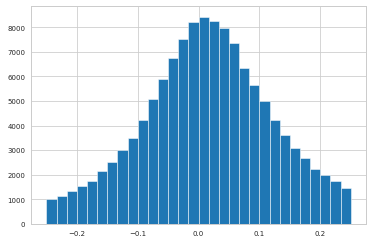

In [31]:
plt.hist(noun_sentence_state_train['avmerror'], bins=30 )

In [32]:
np.percentile(noun_sentence_state_train['avmerror'],[50.])

array([0.01422119])

In [33]:
noun_sentence_state_train['category_predictand'] = 0
noun_sentence_state_train.loc[noun_sentence_state_train['avmerror']>=0.,'category_predictand'] = 1

In [34]:
noun_sentence_state_test['category_predictand'] = 0
noun_sentence_state_test.loc[noun_sentence_state_test['avmerror']>=0.,'category_predictand'] = 1

In [35]:
Predictors = symptoms_df.to_numpy()

In [36]:
Predictors.shape

(125682, 3047)

In [37]:
X_test = symptoms_df_test.to_numpy()

In [38]:
Predictors

array([['19300', 20190220, 1658.0, ..., 0.0, 0.0, 0.0],
       ['33860', 20090715, 1518.0, ..., 0.0, 0.0, 0.0],
       ['13820', 20200828, 1558.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['13820', 20080228, 2895.0, ..., 0.0, 0.0, 0.0],
       ['13820', 20050128, 2360.0, ..., 0.0, 0.0, 0.0],
       ['13820', 20130325, 1298.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [39]:
predictand = noun_sentence_state_train.category_predictand.values

In [40]:
predictand.shape

(125682,)

In [41]:

#nclasses = 3
#discretizer = KBinsDiscretizer(n_bins=nclasses, encode='ordinal', strategy='quantile')

In [42]:
#Series = predictand
#discretizer.fit(Series.reshape(-1,1))
#Series_disctzd = discretizer.transform(Series.reshape(-1,1))
#Series_disctzd = Series_disctzd.reshape(len(Series_disctzd))
#print(discretizer.bin_edges_[0])

In [43]:
X_train = Predictors
y_train = predictand

In [44]:
y_test = noun_sentence_state_test.category_predictand.values

In [45]:
#model = RandomForestClassifier(n_estimators = 100,  min_samples_leaf=30, 
#                              max_features = 6, max_depth=40
#                             )

model = RandomForestClassifier(n_estimators = 100,  min_samples_leaf=20, 
                              max_features = 150, max_depth=50, 
                              )
                              


In [46]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=150, min_samples_leaf=20)

In [47]:
print(model.get_params(deep=True))

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 150, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [48]:
predictions_train = model.predict(X_train)
predictions_train_prob = model.predict_proba(X_train)


The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [49]:
cm_train = confusion_matrix(y_train, predictions_train)
print(cm_train)

[[29159 26456]
 [ 9230 60837]]


In [50]:
accuracy_score(y_train, predictions_train)

0.7160611702550882

(array([[29159.,  9230.],
        [26456., 60837.]]),
 array([0. , 0.5, 1. ]),
 array([0. , 0.5, 1. ]),
 <matplotlib.collections.QuadMesh at 0x7f93c045dba8>)

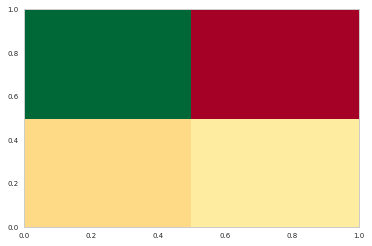

In [51]:
from matplotlib import colors
plt.hist2d(predictions_train, y_train, bins=2, cmap = "RdYlGn_r",
           norm = colors.LogNorm())

In [52]:
predictions_test = model.predict(X_test)
predictions_test_prob = model.predict_proba(X_test)

In [53]:
cm_test = confusion_matrix(y_test, predictions_test)
print(cm_test)

[[10604 13378]
 [ 5818 24065]]


In [54]:
accuracy_score(y_test, predictions_test)

0.6436275874872366

In [ ]:
#top_k_accuracy_score(y_train, predictions_train_prob, k=2)

In [ ]:
#f1_score(y_train, predictions_train, average='macro')

In [ ]:
#f1_score(y_train, predictions_train, average='micro')

In [ ]:
#precision_score(y_train, predictions_train, average= 'macro')

In [ ]:
#top_k_accuracy_score(y_test, predictions_test_prob, k=2)

In [55]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = selcted_columns

In [56]:
for element in np.array(features)[indices]:
    print(element)

perfect morning coffee
traditional floor plan
st vincents
convenient i459
kitchen eat in area
jack and jill bathroom
need room
long price
great features home
vanity area
garden homes
electric oven
designer kitchen
home energy
spacious den fireplace
double trey
updates home
mother law plan
modern fixtures
storm shutters
house home
patio pool
easy flow
eastern shore
golf community
great plans
easy entry
right foyer
custom finishes
bedrooms office
busy day
military bases
main level office
attic fan
new schools
screened in deck
basketball goal
separate garage
two car carport
additional closet
space kitchen
ac units
den office
built in appliances
cook feast kitchen
wooden blinds
multiple windows
cozy cottage
grinder pump
pending inspection
tree house
mountain view
room sunroom
exterior walls
ceramic tile floors kitchen
lawn equipment
front porch welcomes
ceilings den
minutes i20
beautiful arches
extra cabinets
beautiful level lot
stove microwave
main level hvac
workshop basement
heres chanc

cozy sunroom
boat house
oak mountain
bosch dishwasher
doll house
tour home
shower seat
new front door
side porch
main level family room
screened in patio
space need
pella windows
level front
storm room
panel cabinets
pecan trees
clawfoot tub
new black appliances
minute drive
electrical outlets
beautiful garden home
share hall bath
beautiful mountain
home welcomes
gunite pool
brick construction
water frontage
farm house
multiple vehicles
area home
attention detail
spectacular view
historic district
new addition
quiet subdivision
cozy family room
estate agent state alabama
wide baseboards
large tile
full charm
huge walk shower
beach entry pool mushroom waterfall
trail education
lake home
chefs dream kitchen
california closets
two story foyer
smart home
recent years
workshop electricity
new exterior
cabinet package
historic charm
carpet vinyl
new shower
private beach
nest thermostat
highland ridge
outdoor storage
breaker box
year round
office study
wine cellar
upper cabinets
rental income

private courtyard
bedroom office
beautiful hardwood floors, ceramic tile
storage building backyard
decorator colors
level floor plan
long day work
exterior home
huge kitchen island
efficient home
center island
laundry mud room
spacious laundry
new hvac, new roof
wonderful backyard
extra space storage
chace lake epitomizes convenience
screened in porch
favorite realtor
public library
new toilets
huge flat
large loft area
front porch community boasts
incredible views
work island
concrete driveway
year dimensional shingles
items significance purchaser
fabulous outdoor
softball field
new hardwood laminate floors
double carport
columns lead glass windows
open floor plan, stainless appliances
master suite walk closet
huge shower
granite countertops, new carpet
bridle brook
friendly neighborhood
home shows
charm character
plenty closets
bedroom bonus room
dream home
main level bedroom
full bath laundry room
2car garage, bonus room
separate living area
special features amenities
kitchen custom

In [ ]:
import joblib
filename = 'RF_binaryclass_firstStage.sav'
joblib.dump(model,filename)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:

# Number of trees in random forest
n_estimators = [100]
# Number of features to consider at every split
max_features = [ 100, 150, 200]
# Maximum number of levels in tree
max_depth = [40, 50, 60]
# Minimum number of samples required to split a node
min_samples_split = [10, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [15, 20, 25]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [ ]:
n_estimators

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:

#base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
#base_model.fit(train_features, train_labels)
#base_accuracy = evaluate(base_model, test_features, test_labels)

best_random = rf_random.best_estimator_
best_random_model_prediction = best_random.predict(X_test)


In [ ]:
accuracy_score(y_test, best_random_model_prediction)

## Regression

In [146]:
y_train_regressor = noun_sentence_state_train.avmerror.values

modelRegressionFull = RandomForestRegressor(n_estimators = 100,  min_samples_leaf=20, 
                              max_features = 150, max_depth=50)

modelRegressionFull.fit(X_train, y_train_regressor)

RandomForestRegressor(max_depth=50, max_features=150, min_samples_leaf=20)

In [147]:
predictions_train_Regressor = modelRegressionFull.predict(X_train)

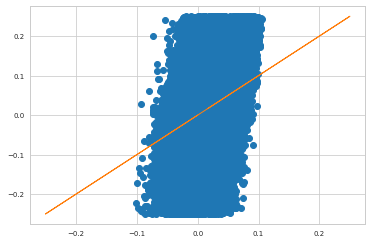

In [148]:
plt.plot(predictions_train_Regressor, y_train_regressor, 'o')
plt.plot(y_train_regressor, y_train_regressor)

(array([ 3445.,  5430.,  9039., 15183., 22513., 24639., 19355., 12858.,
         7987.,  5233.]),
 array([-2.49994842e-01, -1.99996942e-01, -1.49999041e-01, -1.00001141e-01,
        -5.00032401e-02, -5.33960467e-06,  4.99925609e-02,  9.99904614e-02,
         1.49988362e-01,  1.99986262e-01,  2.49984163e-01]),
 <BarContainer object of 10 artists>)

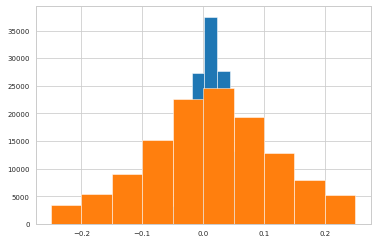

In [149]:
plt.hist(predictions_train_Regressor,bins=10)
plt.hist(y_train_regressor,bins=10)

In [150]:
from scipy.interpolate import interp1d
def q2q(dataset1,dataset2):
    percentiles1 = np.percentile(dataset1,np.arange(1,98,1))
    percentiles2 = np.percentile(dataset2,np.arange(1,98,1))
    f_interpol = interp1d(percentiles1, percentiles2,fill_value="extrapolate")
    dataset1_mod = f_interpol(dataset1)
    return f_interpol, dataset1_mod

In [151]:
f_interpol, predictions_train_Regressor_mod  = q2q(predictions_train_Regressor,y_train_regressor)

(array([   50.,  1717.,  6860., 13791., 26708., 33965., 23917., 12848.,
         5253.,   573.]),
 array([-0.35969036, -0.29034288, -0.22099539, -0.15164791, -0.08230042,
        -0.01295294,  0.05639455,  0.12574203,  0.19508952,  0.26443701,
         0.33378449]),
 <BarContainer object of 10 artists>)

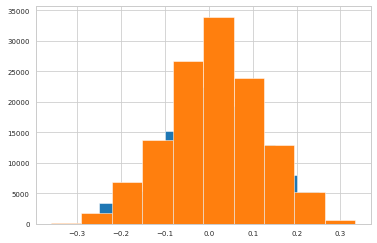

In [152]:
plt.hist(y_train_regressor,bins=10)
plt.hist(predictions_train_Regressor_mod,bins=10)


In [153]:
predictions_train_Regressor_mod

array([-0.01557133,  0.01148743,  0.07286228, ...,  0.09074692,
       -0.02965009,  0.0974234 ])

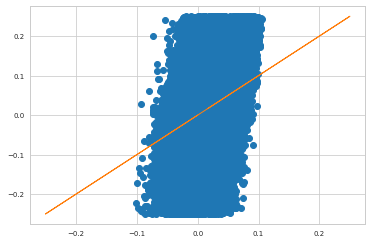

In [154]:
plt.plot(predictions_train_Regressor, y_train_regressor, 'o')
plt.plot(y_train_regressor, y_train_regressor)

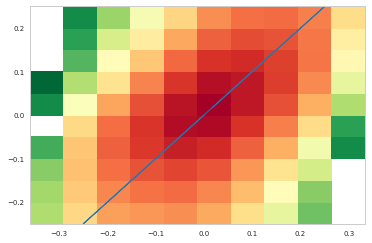

In [155]:
plt.hist2d(predictions_train_Regressor_mod, y_train_regressor, bins=10, cmap = "RdYlGn_r",
           norm = colors.LogNorm())
plt.plot(y_train_regressor,y_train_regressor)

In [156]:
predictions_test_Regressor = modelRegressionFull.predict(X_test)

In [157]:
predictions_test_Regressor_mod = f_interpol(predictions_test_Regressor)

In [158]:
y_test_regressor = noun_sentence_state_test.avmerror.values

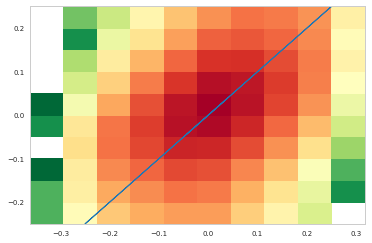

In [159]:
plt.hist2d(predictions_test_Regressor_mod, y_test_regressor, bins=10, cmap = "RdYlGn_r",
           norm = colors.LogNorm())
plt.plot(y_test_regressor,y_test_regressor)

In [160]:
avmValue_test = noun_sentence_state_test['avmValue']
avmValue_train = noun_sentence_state_train['avmValue']

transprice_test = noun_sentence_state_test['Transprice']
transprice_train = noun_sentence_state_train['Transprice']

predictions_test_valueR = avmValue_test/(1-predictions_test_Regressor)
predictions_train_valueR = avmValue_train/(1-predictions_train_Regressor)

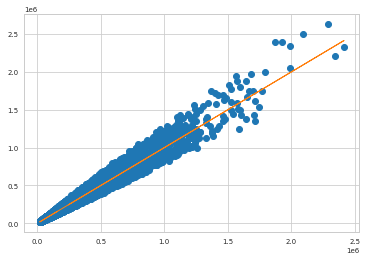

In [161]:


print('') 
fig = plt.figure()
plt.plot(predictions_test_valueR, 
     transprice_test,'o')
plt.plot(predictions_test_valueR,predictions_test_valueR)


In [162]:
print('') 
print('Testing')
print(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
          (transprice_test)))
print(np.mean(np.abs(transprice_test - avmValue_test)/\
              (transprice_test)))

print('') 
print('Training') 
print(np.mean(np.abs(transprice_train-predictions_train_valueR)/\
          (transprice_train)))
print(np.mean(np.abs(transprice_train - avmValue_train)/\
              (transprice_train)))    


Testing
0.07878514626310863
0.08478161680856702

Training
0.07472829327117189
0.08446467748384286


In [ ]:
df_Thu = df.iloc[train_samples:,:17] 

In [ ]:
df_Thu['avmvalue_modified02'] = predictions_test_valueR

In [ ]:
df_Thu = df_Thu.drop(columns=['level_0'])

In [ ]:
df_Thu

In [ ]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_for_Thu_01.fea'
df_Thu.reset_index().to_feather(file_symptoms)

# OLD STUFF

In [ ]:
y_testR

In [ ]:
train_samples = 150000  # Samples used for training the models
X_trainR, X_testR, y_trainR, y_testR = train_test_split(
    Predictors,
    Series,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [ ]:
y_trainR

In [ ]:
modelRegression = [RandomForestRegressor(n_estimators = 100,  min_samples_leaf=20, 
                              max_features = 150, max_depth=50),
                       RandomForestRegressor(n_estimators = 100,  min_samples_leaf=20, 
                              max_features = 150, max_depth=50),
                       RandomForestRegressor(n_estimators = 100,  min_samples_leaf=20, 
                              max_features = 150, max_depth=50)]


In [ ]:
for i in range(3):
    print(i)
    y_trainR_temp = y_trainR[np.where(y_train == i)[0]]
    X_trainR_temp = X_trainR[np.where(y_train == i)[0],:]
    
    y_testR_temp = y_testR[np.where(y_test == i)[0]]
    X_testR_temp = X_testR[np.where(y_test == i)[0],:]    
    
    modelRegression[i].fit(X_trainR_temp, y_trainR_temp)
    
    
 

In [ ]:
for i in range(3):
    print(i)
    import joblib
    filename = 'RF_class_secondStage_'+str(i)+'_.sav'
    joblib.dump(modelRegression[i],filename)

In [ ]:
df = symptoms_dataframe_ri.copy()

for i in range(3):
    print(i)
    y_trainR_temp = y_trainR[np.where(y_train == i)[0]]
    X_trainR_temp = X_trainR[np.where(y_train == i)[0],:]
    
    y_testR_temp = y_testR[np.where(y_test == i)[0]]
    X_testR_temp = X_testR[np.where(y_test == i)[0],:]    
    
    predictions_testR = modelRegression[i].predict(X_testR_temp)
    predictions_trainR = modelRegression[i].predict(X_trainR_temp)

    avmValue_test = df['avmValue'].values[train_samples:][np.where(y_test == i)[0]]
    avmValue_train = df['avmValue'].values[:train_samples][np.where(y_train == i)[0]]
    
    predictions_test_valueR = avmValue_test/(1-predictions_testR)
    predictions_train_valueR = avmValue_train/(1-predictions_trainR)
    
    print('') 
    fig = plt.figure()
    plt.plot(predictions_test_valueR, 
         df['Transprice'].values[train_samples:][np.where(y_test == i)[0]],'o')
    plt.plot(predictions_test_valueR,predictions_test_valueR)
    
    print('') 
    print('Testing')
    print(np.mean(np.abs(df['Transprice'].values[train_samples:][np.where(y_test == i)[0]]-predictions_test_valueR)/\
              (df['Transprice'].values[train_samples:][np.where(y_test == i)[0]])))
    print(np.mean(np.abs(df['Transprice'].values[train_samples:][np.where(y_test == i)[0]] - avmValue_test)/\
                  (df['Transprice'].values[train_samples:][np.where(y_test == i)[0]])))
    
    print('') 
    print('Training') 
    print(np.mean(np.abs(df['Transprice'].values[:train_samples][np.where(y_train == i)[0]]-predictions_train_valueR)/\
              (df['Transprice'].values[:train_samples][np.where(y_train == i)[0]])))
    print(np.mean(np.abs(df['Transprice'].values[:train_samples][np.where(y_train == i)[0]] - avmValue_train)/\
                  (df['Transprice'].values[:train_samples][np.where(y_train == i)[0]])))    

In [ ]:
fig = plt.figure(figsize=(12,10))
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns


In [ ]:
list(features[indices][-250:])

In [ ]:
[features[i] for i in indices]

In [ ]:
symptoms_dataframe_ri